In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch as torch

colourMap = plt.cm.magma 

def add_texture(x, y, kx, ky, cond=2, angle=0, centre = (10,0)):
    # TIMESTAMP = datetime.utcnow().strftime('%Y%m%d-%H%M%S-%f')
    angle = angle*np.pi/180

    x_rot = centre[0] + x*np.cos(angle) - y*np.sin(angle)
    y_rot = centre[1] + x*np.sin(angle) + y*np.cos(angle)

    z = cond*(0.5*(2+ np.sin(kx*x_rot) + np.sin(ky*y_rot)))

    #print(np.max(z), np.min(z))
    plt.imshow(z, extent = [0,1,0,1])
    plt.colorbar()
    return

/home/derick/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352428622/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
A = np.zeros(4)
A[0:6]

array([0., 0., 0., 0.])

In [3]:
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y)

angle = 45 

k = np.linspace(20, 0, num=5, endpoint=False)
print(k)

[20. 16. 12.  8.  4.]


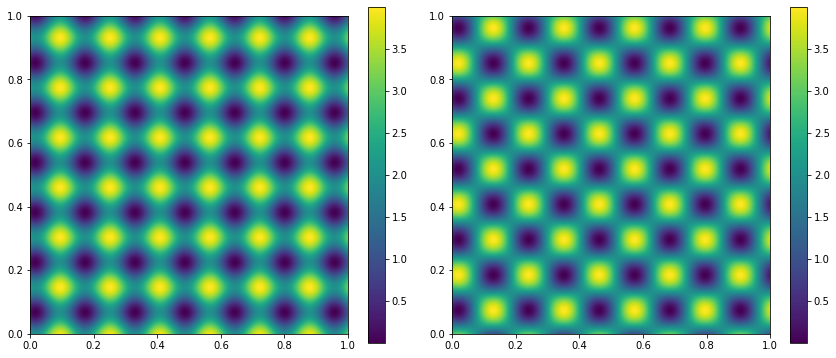

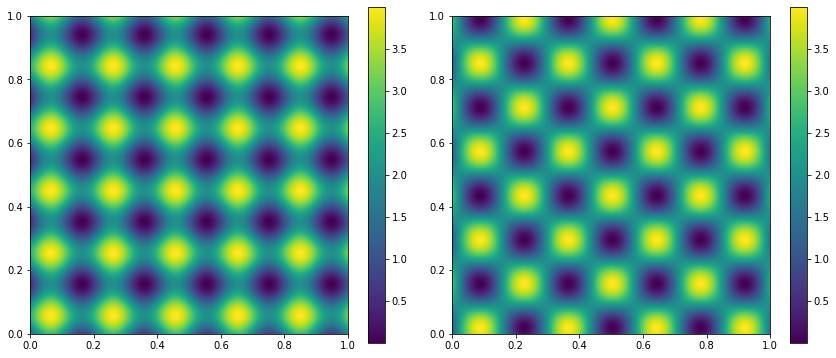

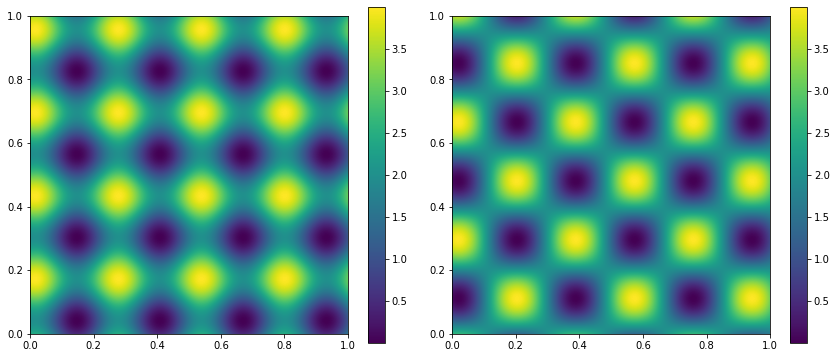

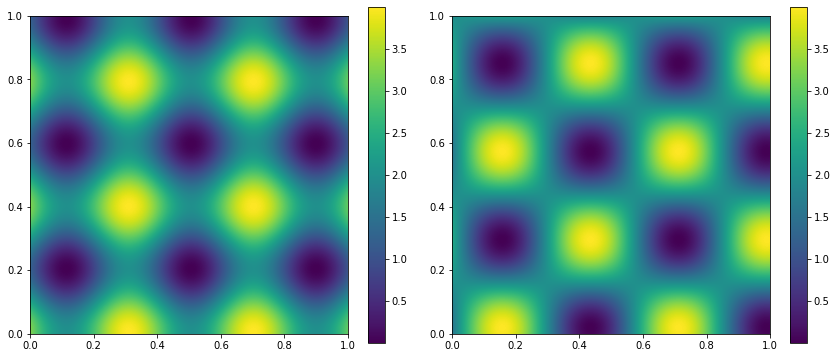

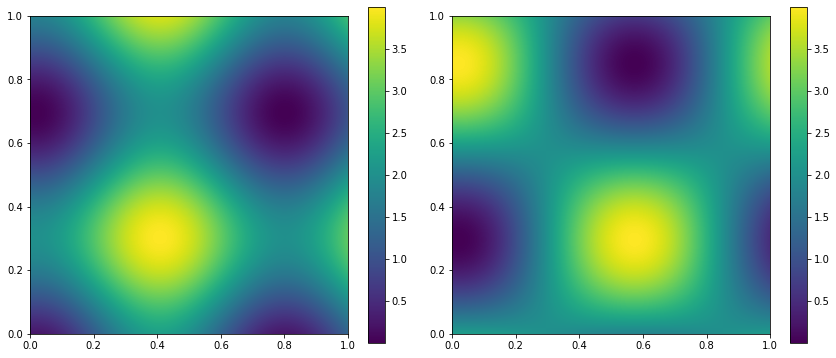

In [4]:


for kx, ky in zip(k, k):
    #print(kx)
    #ky = ky + 20
    fig = plt.figure(figsize=((5+1)*2, 5))
    plt.subplot(1, 2, 1)
    add_texture(X, Y, kx, ky, angle=0)
    plt.subplot(1, 2, 2)
    add_texture(X, Y, kx, ky, angle=angle)
    fig.tight_layout()
    plt.show

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.io




mesh   = scipy.io.loadmat('data/1_samples__max_Inclusions_32023-07-27-19-30-27/mesh_pet.mat')
mesh
bound  = scipy.io.loadmat('data/1_samples__max_Inclusions_32023-07-27-19-30-27/dataset_bound.mat')
domain = scipy.io.loadmat('data/1_samples__max_Inclusions_32023-07-27-19-30-27/dataset_domain.mat')

volt = bound['outputBoundvoltage']
curr = bound['outputBoundcurrent']
angl = bound['angl_circum'       ]

cond = domain['inputConductivity']
VOLT = domain['outputVoltage'    ]

p = mesh['p']
e = mesh['e']
t = mesh['t']

# print(p.shape)
# print(e.shape)
# print(t.shape)


x, y = p[0], p[1]

a = e[1].reshape(-1,1)
b = e[2].reshape(-1,1)
c = e[3].reshape(-1,1)

eles = np.concatenate([a, b, c], axis=1)
node_vals = cond[0,:]

# print(x.shape)
# print(y.shape)
# print(eles.shape)
# print(node_vals.shape)
print('We are plotting')
plt.tricontourf(x, y, eles , node_vals, 12)
plt.colorbar()
print('We are showing')
plt.show()
print('We are simport numpy as np

SyntaxError: EOL while scanning string literal (1392745053.py, line 48)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import Normalize, LinearSegmentedColormap
from scipy.io import loadmat, savemat

# Ellipse parameters and values
num_ellipses = 10
r = 1  # Radius of the circle containing ellipses

file_path = '/pvfs2/Derick/EIT/Mine/data/100_samples__max_Inclusions_3__2023-08-05-03-34-06/'
data_inc  = loadmat(file_path+'inclusions.mat')

sample = 99
HH    = data_inc['HH'][sample,...]
KK    = data_inc['KK'][sample,...]
AA    = data_inc['AA'][sample,...]
BB    = data_inc['BB'][sample,...]
ALPHA = data_inc['ALPHA'][sample,...]
COND  = data_inc['COND'][sample,...]
mask = AA!=0

HH    = HH[mask]
KK    = KK[mask]
AA    = AA[mask]
BB    = BB[mask]
ALPHA = ALPHA[mask]
COND  = COND[mask]
print(COND)

[1.5080698 1.6471827 1.9483043]


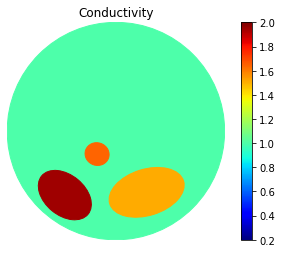

In [2]:
ellipse_params = np.vstack((HH, KK, AA, BB, ALPHA)).T#np.random.rand(num_ellipses, 5)  # h, k, a, b, alpha
values = COND #np.random.rand(num_ellipses)  # Values associated with ellipses

# Create colormap
cmap = plt.cm.get_cmap('jet')  #('viridis')  # Change 'viridis' to any desired colormap

# Normalize values
mini = 0.2; maxi = 2
norm = norm = Normalize(vmin=mini, vmax=maxi) #Normalize(vmin=min(values), vmax=max(values))
# Create figure and axis
fig, ax = plt.subplots()

# Plot circle
circle = plt.Circle((0, 0), r, color=cmap(norm(1)))#, alpha=0.5) #plt.Circle((0, 0), r, color=cmap(norm(np.mean(values))), alpha=0.5)
ax.add_artist(circle)

# circle = plt.Circle((0, 0), 0.9, alpha=0.9)
# ax.add_artist(circle)

# Set axis limits to encompass the entire circle and ellipses
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)

# Plot ellipses
for params, value in zip(ellipse_params, values):
    h, k, a, b, alpha = params
    ellipse = Ellipse((h, k), 2 * a, 2 * b, angle=np.degrees(alpha), color=cmap(norm(value)))#, alpha=0.7)
    ax.add_artist(ellipse)

    # Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array
cbar = plt.colorbar(sm)
#cbar.set_label('Values')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Conductivity')
ax.axis('off')
#ax.axis('equal')

# Set aspect ratio to equal
ax.set_aspect('equal')

# Show plot
plt.show()
#plt.savefig(figname)

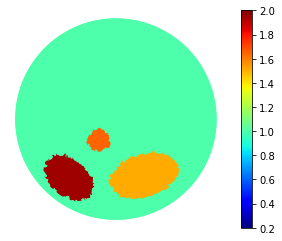

In [3]:
data_dom = loadmat(file_path+'dataset_domain.mat')
cond = data_dom['inputConductivity'][sample,...]
x    = data_dom['x1'               ]#[sample,...]
y    = data_dom['x2'               ]#[sample,...]

colorbar = 'jet'
plt.scatter(x, y, c = cond, cmap=colorbar, marker='.', vmin=mini, vmax=maxi) # !!mistake you are plotting first 400 since z[i]. Use z[samp] for random samples
plt.axis('square')
plt.axis('off')
#plt.title(str(samp))
plt.colorbar()

In [5]:
import numpy as np
import pyvista as pv
from scipy.io import loadmat

# Load the .mat file containing mesh data
mat_data = loadmat(file_path+'mesh.mat')

# Extract vertices, faces, and other relevant data from the mat_data
vertices = mat_data['vertices']
faces = mat_data['faces']

# Create a PyVista mesh object
mesh = pv.PolyData(vertices, faces)

# Create a plotting window
plotter = pv.Plotter()

# Add the mesh to the plotter
plotter.add_mesh(mesh)

# Set plot options (optional)
plotter.set_background('white')
plotter.show_grid()

ModuleNotFoundError: No module named 'pyvista'

In [ ]:
mat_data = loadmat(file_path+'mesh.mat')
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Aug  5 03:55:07 2023',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'mesh', b'MCOS', b'pde.FEMesh', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [         1],
                      [         2]], dtype=uint32))                  ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

In [ ]:
import pyvista as pv

# Load the VTK file
vtk_file_path = file_path+'mesh.vtk'
mesh = pv.read(vtk_file_path)

# Create a plotting window
plotter = pv.Plotter()

# Add the mesh to the plotter
plotter.add_mesh(mesh)

# Set plot options (optional)
plotter.set_background('white')
plotter.show_grid()

# Show the plot
plotter.show()